# ***1.Import Libraries***

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# ***2.Import Data and Exploratory Data Analysis*** 

In [48]:
# Load the dataset and preview the first few rows to understand its structure.

df = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [49]:
df.info()
#Each column's data type, the number of rows and columns, memory usage, missing values, and the data types' numerical distribution are all shown.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [50]:
df.describe()
#count: The column's total number of non-null values.

#mean: The column's average of the values.

#std: The values in the column's standard deviation.

#min: The column's smallest value.

#25%: The value that falls below 25% of the numbers in the column is known as the lower quartile.

#50%: The value that falls between half and half of the values in the column is called the median, or 50%.

#75%: The value below 75% of the values in the column, or the upper quartile.

#max: The column's highest value.

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#Allows us to see the number of rows and columns in the dataset.
df.shape


(17880, 18)

In [52]:
#We can see the number of missing data for each title.
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [53]:
#We can see the total number of missing values
df.isna().sum().sum()

70106

In [54]:
#We can see the number of non-missing data for each title.
df.notnull().sum()

job_id                 17880
title                  17880
location               17534
department              6333
salary_range            2868
company_profile        14572
description            17879
requirements           15184
benefits               10668
telecommuting          17880
has_company_logo       17880
has_questions          17880
employment_type        14409
required_experience    10830
required_education      9775
industry               12977
function               11425
fraudulent             17880
dtype: int64

In [55]:
#We can see the total number of non-missing values
df.notnull().sum().sum()

251734

In [56]:
# Calculate the number of missing values in each column
missing_counts = df.isna().sum()

# Calculate the percentage of missing values relative to the total number of rows
missing_percent = 100 * missing_counts / len(df)

# Create a DataFrame to summarize missing counts and percentages for each column
missing_df = pd.DataFrame({'missing_count': missing_counts, 'missing_percent': missing_percent})

# Print the summary sorted by the highest percentage of missing values first
print(missing_df.sort_values(by='missing_percent', ascending=False))


                     missing_count  missing_percent
salary_range                 15012        83.959732
department                   11547        64.580537
required_education            8105        45.329978
benefits                      7212        40.335570
required_experience           7050        39.429530
function                      6455        36.101790
industry                      4903        27.421700
employment_type               3471        19.412752
company_profile               3308        18.501119
requirements                  2696        15.078300
location                       346         1.935123
description                      1         0.005593
job_id                           0         0.000000
telecommuting                    0         0.000000
has_questions                    0         0.000000
has_company_logo                 0         0.000000
title                            0         0.000000
fraudulent                       0         0.000000


The output gives a clear picture of the dataset's distribution of missing data.  It is essential to comprehend missing values because:

**Data Quality Assessment:** It assists in determining whether features have a high number of missing values, which can impair the performance of the model.

**Feature Selection:** Features with extremely high missing rates, such as department and salary_range, may be less trustworthy and may need to be eliminated or carefully imputationed.

**Preprocessing Decisions:** Depending on the quantity of missing data, one can decide whether to utilise more sophisticated imputation algorithms, develop distinct markers for missingness, or fill in missing values with mean, median, and mode.

**Model Accuracy:** Your machine learning model will be more resilient and generalised if missing data is handled properly, as this avoids biassed or erroneous model outcomes.

**Understanding Data Collection:** Missingness patterns themselves might occasionally contain information that can be utilised as a feature (for example, a missing company_profile may be associated with fraudulent postings).

In conclusion, examining missing data enables you to make well-informed choices during the subsequent stages of preprocessing and data cleaning, which eventuallyimproves model results.



In [57]:
# Determine and report the average fraud rate for rows with and without missing data independently for each column that contains missing values.
# This makes it easier to determine whether a column's missingness is connected to fraud.

for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f"\nMissing in column '{col}':")
        print(df.groupby(df[col].isna())['fraudulent'].mean())



Missing in column 'location':
location
False    0.048306
True     0.054913
Name: fraudulent, dtype: float64

Missing in column 'department':
department
False    0.052898
True     0.045986
Name: fraudulent, dtype: float64

Missing in column 'salary_range':
salary_range
False    0.077755
True     0.042832
Name: fraudulent, dtype: float64

Missing in column 'company_profile':
company_profile
False    0.019146
True     0.177449
Name: fraudulent, dtype: float64

Missing in column 'description':
description
False    0.048381
True     1.000000
Name: fraudulent, dtype: float64

Missing in column 'requirements':
requirements
False    0.046891
True     0.057122
Name: fraudulent, dtype: float64

Missing in column 'benefits':
benefits
False    0.047057
True     0.050471
Name: fraudulent, dtype: float64

Missing in column 'employment_type':
employment_type
False    0.043376
True     0.069432
Name: fraudulent, dtype: float64

Missing in column 'required_experience':
required_experience
False    0.0

This result displays, individually, the percentage of missing data in specific columns for job ads that are fraudulent (True) and those that are not.

For instance, compared to non-fraudulent postings 0.019146, the company_profile field has a significantly higher missing rate in fraudulent posters 0.177449.

In a similar vein, 100% of fake records lack a description, suggesting that this could be a powerful clue to fraud.

There are some, but not as significant, changes in missing rates between fraudulent and non-fraudulent posts in other categories, such as department, salary_range, requirements, and benefits.

Given that fraudulent job posts typically have more missing information in particular fields, this shows that missingness itself may be a valuable attribute to detect fraud.

In [58]:
# Text lengths
df['desc_length'] = df['description'].astype(str).apply(len)
df['title_length'] = df['title'].astype(str).apply(len)
df['req_length'] = df['requirements'].astype(str).apply(len)
df['benefits_length'] = df['benefits'].astype(str).apply(len)
df['company_profile_length'] = df['company_profile'].astype(str).apply(len)

# Binary columns can be used directly if they are already 0/1, otherwise can be converted
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']
for col in binary_cols:
    df[col] = df[col].fillna(0).astype(int)

# We can Label Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
cat_cols = ['location', 'employment_type', 'industry', 'function', 'required_experience', 'required_education']

for col in cat_cols:
    df[col] = df[col].fillna('missing')  # Eksik değerleri 'missing' yap
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Analysis of average lengths on a fraudulent basis
print(df.groupby('fraudulent')[['desc_length', 'title_length', 'req_length', 'benefits_length', 'company_profile_length']].mean())

# Average of binary and categorical columns on fraudulent basis
print(df.groupby('fraudulent')[binary_cols + cat_cols].mean())




            desc_length  title_length  req_length  benefits_length  \
fraudulent                                                           
0           1221.219701     28.421594  597.914130       209.935171   
1           1154.838337     30.666282  446.583141       213.457275   

            company_profile_length  
fraudulent                          
0                       641.232456  
1                       232.924942  
            telecommuting  has_company_logo  has_questions     location  \
fraudulent                                                                
0                0.041319          0.819149       0.502057  1563.538850   
1                0.073903          0.326790       0.288684  1955.994226   

            employment_type   industry   function  required_experience  \
fraudulent                                                               
0                  1.811978  74.140237  23.940167             4.608323   
1                  2.257506  81.638568  21.19284

The average values of a number of attributes are displayed in this output, categorised by the goal variable fraudulent (0 = legitimate job listings, 1 = fraudulent job posts).

**Features of Text Length:** Compared to fraudulent postings (fraudulent=1), genuine postings (fraudulent=0) typically include lengthier corporate profiles (company_profile_length), requirement texts (req_length), and descriptions (desc_length).  It's interesting to note that the titles and perks content of bogus postings are typically a little lengthier.

**Binary Features:** The percentage of telecommuting positions with false postings is marginally greater.  In contrast to authentic postings, counterfeit ones are less likely to contain questions (has_questions) or a firm logo (has_company_logo).

**Categorical Features:** Fake job listings typically feature somewhat lower numbers for job function and different and higher values for categorical attributes including location, industry, type of work, and experience.  This implies that phoney job postings target various professions.

**Education Requirements:** On average, fraudulent job advertising call for somewhat higher educational backgrounds.

All things considered, these variations point to clear trends between authentic and fraudulent job advertisements, which classification algorithms may find helpful.

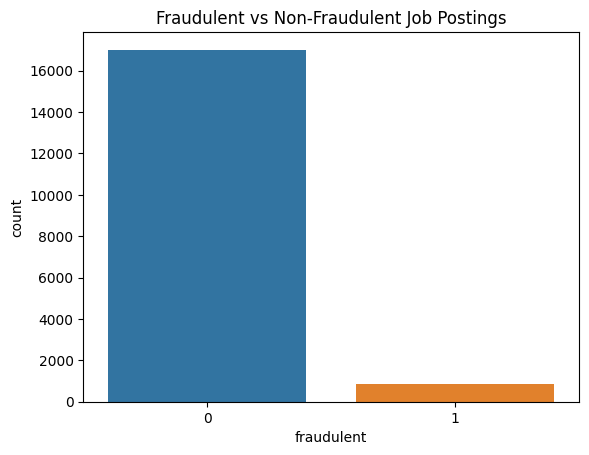

In [59]:
sns.countplot(x='fraudulent', data=df)
plt.title('Fraudulent vs Non-Fraudulent Job Postings')
plt.show()

The distribution of the dataset's fraudulent (1) and non-fraudulent (0) job listings is displayed in the count plot.  With more than 16,000 legitimate job postings compared to approximately 1,000 fake ones, it is evident that legitimate job postings greatly outweigh fraudulent ones.  When developing machine learning models, it is crucial to take this class imbalance into account because it could have an impact on the model's capacity to accurately detect the minority class (fraudulent postings).

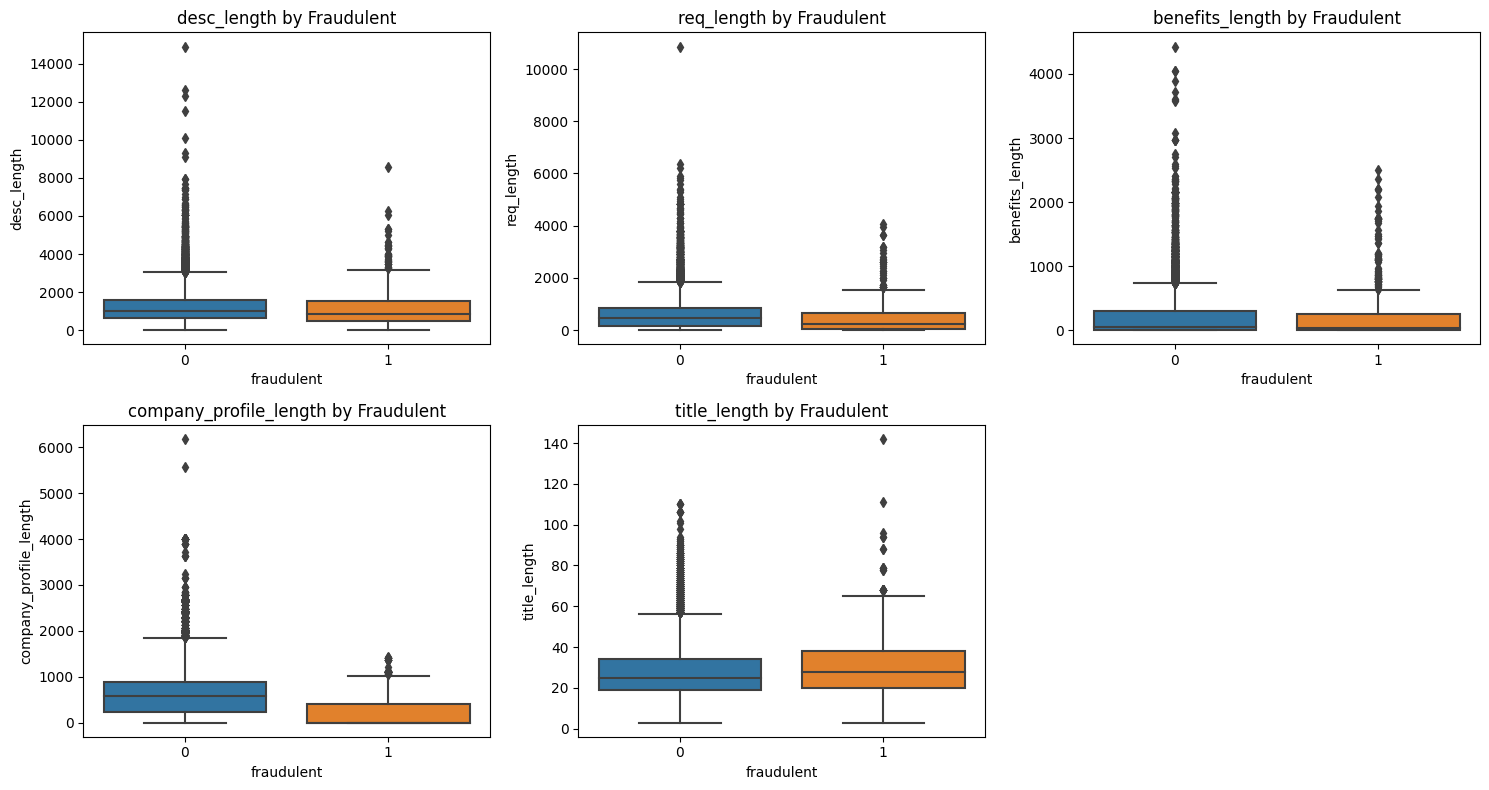

In [60]:
# Numeric columns we will examine
num_cols = ['desc_length', 'req_length', 'benefits_length', 
            'company_profile_length', 'title_length']

# Create subgraphs
plt.figure(figsize=(15, 8))

# Draw a subplot for each column
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='fraudulent', y=col, data=df)
    plt.title(f'{col} by Fraudulent')

plt.tight_layout()
plt.show()


**desc_lenght:** The descriptions of fake job postings are typically shorter.  This indicates that fraudulent postings are typically less informative and more surface-level.  Longer, more thorough descriptions are typically found in genuine postings.

**req_length:** The requirements in fake job advertising are sometimes less detailed or nonexistent.  Actual job listings include comprehensive requirements pertinent to the role.  This distinction renders phoney job advertisements unprofessional.

**benefits_length:** The two classes could not differ all that much from one another.  However, the benefits portion in phoney job postings is typically brief or blank.  This part is longer in actual job listings since employers want to emphasise their advantages.

**company_profile_length:** One of the most noticeable distinctions is this.  The firm profile is lengthy and detailed in actual job postings.  Fake job postings are frequently blank, extremely brief, or incomplete.  When it comes to dependability, this is a crucial differentiator.

**title_length:** Although the difference is not very visible, fake job postings may have somewhat longer headlines than genuine ones, which could suggest that misleading wording was used to get attention.



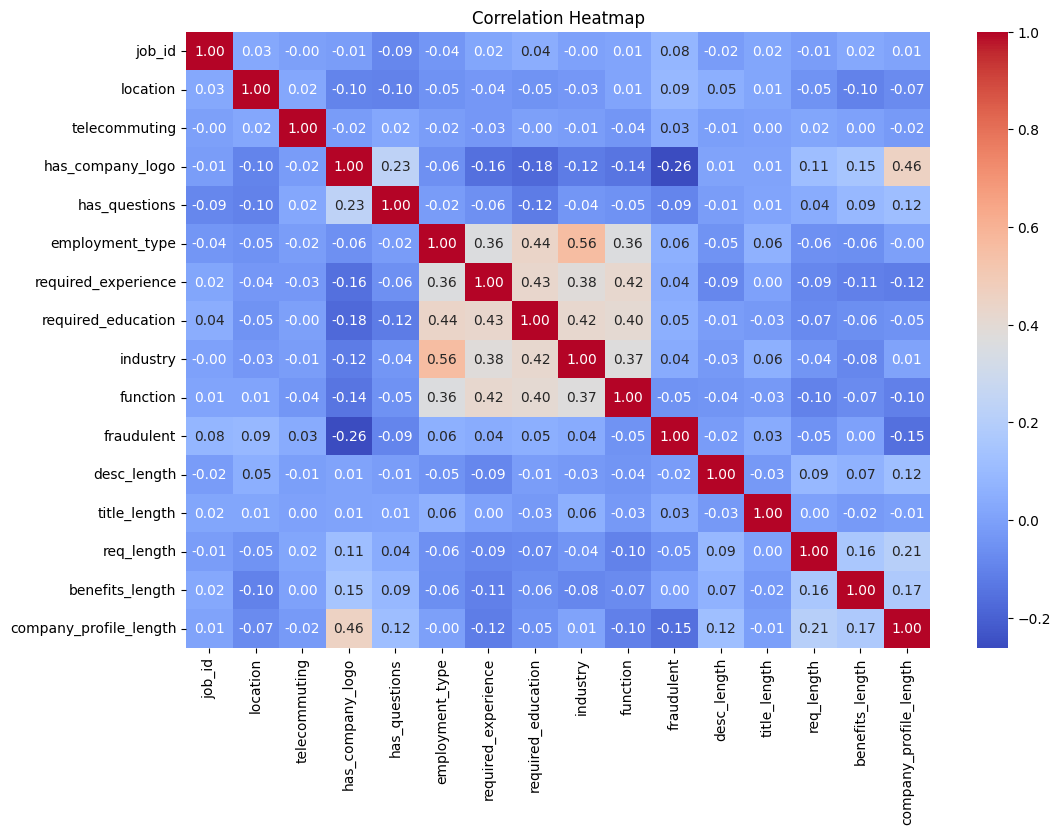

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The linear relationships between numerical features are displayed in the correlation matrix. We find that features such as has_company_logo, company_profile_length, and desc_length have a negative correlation with fraudulent, suggesting that fraudulent job listings typically have shorter company profiles, fewer company logos, and shorter descriptions.  Key signs of fraudulent listings can be found with the aid of these insights.

# ***3.Data Preprocessing***

Although the dataset frequently contains text, categories, or missing values that cannot be used directly, machine learning models require numerical input.

During this procedure:

TF-IDF vectorisation was used to transform text columns into numerical characteristics.

To represent their order, ordinal categorical variables (such as required_education and required_experience) were label encoded.



In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

#Ordinal Columns
ordinal_cols = ['required_experience', 'required_education']
le = LabelEncoder()
for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
        df[col] = le.fit_transform(df[col])

#Binary Columns
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']

#Categorical Columns
categorical_cols = ['location', 'department', 'salary_range', 'employment_type', 'industry', 'function']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
df_nominal = pd.get_dummies(df[categorical_cols], drop_first=True)

#Text Columns
text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']
tfidf_vectors = []
for col in text_cols:
    df[col] = df[col].fillna('')
    vectorizer = TfidfVectorizer(max_features=500)
    tfidf_vec = vectorizer.fit_transform(df[col])
    tfidf_vectors.append(tfidf_vec)

#Numeric columns (ordinal + binary)
numeric_cols = ordinal_cols + binary_cols
df_numeric = df[numeric_cols]

#Sparse 
numeric_sparse = csr_matrix(df_numeric.values)

#Combine all
X = hstack(tfidf_vectors + [numeric_sparse])

#Target variable
y = df['fraudulent'].values

print('Feature matrix shape:', X.shape)
print('Target vector shape:', y.shape)




Feature matrix shape: (17880, 2505)
Target vector shape: (17880,)


**Processing of Ordinal Columns:** "Unknown" is initially used to fill in the missing values for ordinal categorical columns like required_experience and required_education. LabelEncoder is then used to assign a numerical value to each category. These columns are therefore numeric.

**Processing of Binary Columns:** has_company_logo, has_questions, and telecommuting Columns are used directly since they are already binary variables of the 0/1 type.

**Processing of Text Columns:** Null values are entered in long text columns such as title, company_profile, description, requirements, and benefits. Each of them is then subjected to TfidfVectorizer. With a maximum of 500 characteristics, this approach transforms texts into numerical vectors.

**Processing of Numerical Columns:** Involves combining binary and ordinal columns to create numerical data.

**Data Conversion to Sparse Matrix:** TF-IDF-obtained numerical data and matrices are transformed into sparse format, which is advantageous for processing and memory.

**Combination of All Features:** A single feature matrix X is produced for the model by horizontally combining (hstack) the TF-IDF matrices derived from the texts and the numerical sparse matrix.

**Target Variable Separation:** variable y is designated as the target variable (label) for the bogus column.

In [63]:
print(df.isnull().sum())


job_id                    0
title                     0
location                  0
department                0
salary_range              0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
fraudulent                0
desc_length               0
title_length              0
req_length                0
benefits_length           0
company_profile_length    0
dtype: int64


In the text and ordinal columns, all missing values were filled in (with empty strings for text and 'Unknown' for ordinal).  This guarantees that the dataset is clean and prepared for machine learning models by removing any remaining null values.

In [64]:
from scipy.sparse import vstack

#Real and fake job indexes
real_idx = np.where(y == 0)[0]
fake_idx = np.where(y == 1)[0]

#Randomly select as many real job samples as fake jobs
np.random.seed(42)
real_idx_sampled = np.random.choice(real_idx, size=len(fake_idx), replace=False)

#New balance indices
balanced_idx = np.concatenate([real_idx_sampled, fake_idx])

# New X and Y
X_balanced = X[balanced_idx]
y_balanced = y[balanced_idx]

print("Before balancing:", np.bincount(y))
print("After balancing:", np.bincount(y_balanced))


Before balancing: [17014   866]
After balancing: [866 866]


By randomly undersampling the majority class (real jobs) to equal the number of samples in the minority class (fake jobs), this method balances the dataset.  We take this action because machine learning models may perform poorly on the minority class due to bias towards the majority class caused by an unbalanced dataset.  We improve the model's capacity to identify phoney jobs by balancing the classes so that it learns equally from both.  In order to produce a balanced dataset, the code first determines indices of actual and fake jobs, then chooses at random a subset of real job samples equal to the number of fake jobs.  The distribution of classes before and after balancing is displayed in the print statements.

In [65]:
from sklearn.model_selection import train_test_split

#We split the dataset into training and testing
#With stratify=y, the class distribution is preserved in both clusters.
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:", np.bincount(y_train))
print("Test target distribution:", np.bincount(y_test))


Training set shape: (1385, 2505)
Test set shape: (347, 2505)
Training target distribution: [692 693]
Test target distribution: [174 173]


The balanced dataset was divided into testing and training sets.  By ensuring that the class distribution is constant across both sets, stratify=y_balanced aids in the model's equitable learning from both classes.  The model is trained using the training set, and its performance on unseen data is assessed using the test set.

# ***4.Supervised Learning Algorithms***

In supervised learning, the model is trained using labelled data, which means that every input has the appropriate output.  In order to forecast labels for fresh, unseen data, the model is supposed to understand the link between inputs and outputs.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Create the model
lr = LogisticRegression(max_iter=1000, random_state=42)

#Train the model with training data
lr.fit(X_train, y_train)

#Make predictions with test data
y_pred = lr.predict(X_test)

#Report model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.86      0.91       174
           1       0.88      0.98      0.92       173

    accuracy                           0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347



Using the training data and the default settings, we trained a logistic regression model and assessed how well it performed on the test set.

**Precision:** How many of the class-wide predictions made by the model were true?

**Recall:** How many real objects in a class did the model accurately identify? 

Precision and recall are balanced into a single score by the F1-score, which is the harmonic mean of the two measures.

**Support:** The quantity of actual cases in the test set for every class.

With an accuracy of almost 92%, the results demonstrate a balanced and robust performance, indicating that the model is effective at differentiating between genuine and fraudulent job advertisements.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Model description
rf = RandomForestClassifier(random_state=42)

#Train the model
rf.fit(X_train, y_train)

#Make a prediction on the test set
y_pred = rf.predict(X_test)

#Performance report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       174
           1       0.87      0.95      0.91       173

    accuracy                           0.91       347
   macro avg       0.91      0.91      0.91       347
weighted avg       0.91      0.91      0.91       347



To increase prediction accuracy and decrease overfitting, we employ the Random Forest classifier, an ensemble learning technique that constructs several decision trees and aggregates their output.  Without adjusting any hyperparameters, we train the model using the training data and assess its performance using the test data.  This provides us with the model's baseline performance.

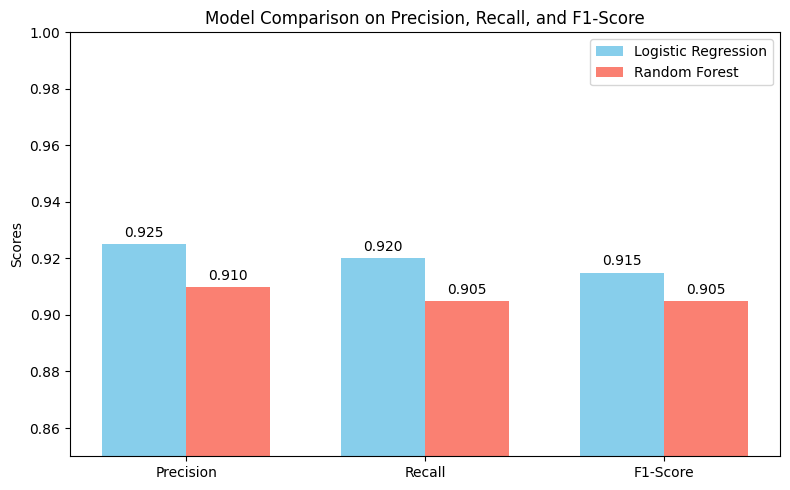

In [68]:
#Metrics of models
metrics = ['Precision', 'Recall', 'F1-Score']

# Logistic Regression results
lr_scores = [0.925, 0.92, 0.915]  #Based on macro avg

# Random Forest results
rf_scores = [0.91, 0.905, 0.905]  #Based on macro avg

x = np.arange(len(metrics))  # [0,1,2]
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison on Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim([0.85, 1.0])
ax.legend()

#Write the scores above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


The effectiveness of two classification models, Random Forest and Logistic Regression, is contrasted in the bar chart above using three important evaluation metrics: F1-Score (using macro averages), Precision, and Recall.

As can be shown, Logistic Regression performs better than Random Forest on all three criteria.  In particular, Logistic Regression attains greater F1-Score (0.915 vs. 0.905), Precision (0.925 vs. 0.91), and Recall (0.92 vs. 0.905).  This implies that, for this specific dataset, Logistic Regression offers a superior balance between accurately identifying positive cases and reducing false positives and false negatives.

Since Random Forest is a more complicated ensemble method, it might need more data or more tweaking to outperform Logistic Regression. In this case, Logistic Regression performed better because it was able to accurately represent the linear decision boundary in the data.

Based on these measures, Logistic Regression is a better option in this case since it produces stronger and more consistent classification results overall.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#Define the model
lr = LogisticRegression(max_iter=1000, random_state=42)

#Get cross-validation F1 scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1')

print("Cross-validation F1 scores:", cv_scores)
print("Average F1 score:", cv_scores.mean())



Cross-validation F1 scores: [0.90909091 0.93992933 0.93140794 0.93286219 0.87769784]
Average F1 score: 0.9181976424980848


To accurately assess the performance of the Logistic Regression model, we employed cross-validation with F1 score.  This approach provides a more precise and reliable assessment of the model's performance on new data by testing it on several data splits.  Strong and reliable results are shown by the average F1 score of 0.92.


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report


#Define parameter ranges
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l1', 'l2'],      # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2
}

#Define model
lr = LogisticRegression(max_iter=5000, random_state=42)


# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=30,       #Combination to try
    cv=3,            #3-fold cross-validation
    scoring='f1',    #F1 score will be optimized
    random_state=42,
    n_jobs=-1        
)

#Train the model
random_search.fit(X_train, y_train)

#Results
print("Best parameters:", random_search.best_params_)
print("Best CV F1 score:", random_search.best_score_)

#Predicts and results
best_lr = random_search.best_estimator_
y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred))




Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 206.913808111479}
Best CV F1 score: 0.9305412513304052
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       174
           1       0.91      0.98      0.94       173

    accuracy                           0.94       347
   macro avg       0.94      0.94      0.94       347
weighted avg       0.94      0.94      0.94       347



The results of the hyperparameter tuning show that the liblinear solver, a l2 penalty (regularisation), and a reasonably high regularisation strength C value of roughly 206.91 produced the best logistic regression model.

During cross-validation, this combination produced the highest average F1 score of 0.9305, indicating a good balance between recall and precision.

The final evaluation on the test set demonstrates the model's good performance, with both classes achieving equally high precision, recall, and F1-scores (~0.94) and a total accuracy of 94%.  For class 0, the model specifically achieves high precision (0.98) and recall (0.90), whereas for class 1, it achieves high precision (0.91) and recall (0.98).

In conclusion, these findings demonstrate that the logistic regression model was considerably enhanced by hyperparameter tweaking, becoming robust and balanced in its ability to accurately identify both classes.  This model setup is ideal for deployment or more research.


        Metric  Before Tuning  After Tuning
0  Precision_0           0.97          0.98
1     Recall_0           0.86          0.90
2         F1_0           0.91          0.94
3  Precision_1           0.88          0.91
4     Recall_1           0.98          0.98
5         F1_1           0.92          0.94
6     Accuracy           0.92          0.94


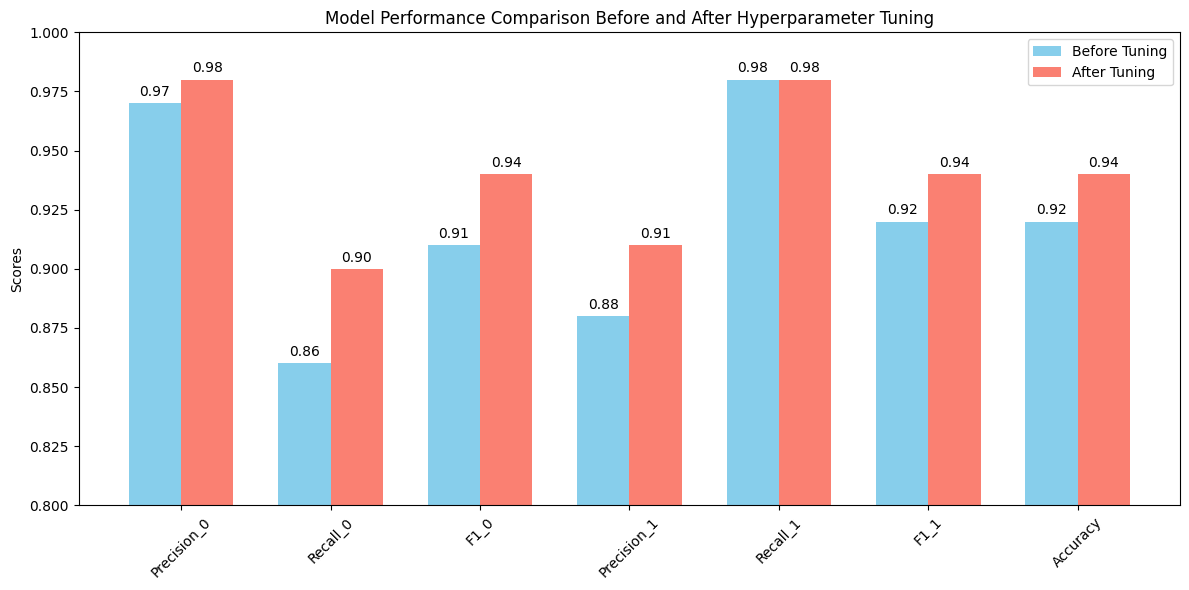

In [71]:
#Names for performance metrics 
metrics = ['Precision_0', 'Recall_0', 'F1_0', 'Precision_1', 'Recall_1', 'F1_1', 'Accuracy']

#Old values
before_tuning = [
    0.97,  # Precision class 0
    0.86,  # Recall class 0
    0.91,  # F1-score class 0
    0.88,  # Precision class 1
    0.98,  # Recall class 1
    0.92,  # F1-score class 1
    0.92   # Accuracy overall
]

#New values (after hyperparameter tuning)
after_tuning = [
    0.98,  # Precision class 0
    0.90,  # Recall class 0
    0.94,  # F1-score class 0
    0.91,  # Precision class 1
    0.98,  # Recall class 1
    0.94,  # F1-score class 1
    0.94   # Accuracy overall
]

#Show as table
df = pd.DataFrame({
    'Metric': metrics,
    'Before Tuning': before_tuning,
    'After Tuning': after_tuning
})

print(df)

#For the chart
x = np.arange(len(metrics)) 
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='skyblue')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison Before and After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.set_ylim(0.8, 1.0) 
ax.legend()

#Function that prints values ​​on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


The Logistic Regression model's performance metrics are shown in the table and bar chart both before and after hyperparameter adjustment.  In addition to total accuracy, the metrics displayed include precision, recall, and F1-score for each class (0 and 1).

The model's precision values were high for both classes prior to tuning (0.97 for class 0 and 0.88 for class 1), but its recall was a little off (0.86 for class 0 and 0.98 for class 1).  The accuracy was 0.92 overall.

The model improves on the majority of measures after adjustment.  The F1-score rose from 0.91 to 0.94 as a result of a minor increase in precision for class 0 to 0.98 and a large improvement in recall for class 0 from 0.86 to 0.90.  Class 1 metrics either stayed high or somewhat improved.  Additionally, the overall accuracy rose from 0.92 to 0.94.

These enhancements imply that the model's balance and generalisation were improved by hyperparameter tuning, especially the recall and F1-score for class 0 without compromising performance on class 1.


By contrasting the heights of the bars that represent each metric before and after tuning, the visualisation amply illustrates these increases and validates the beneficial effect of hyperparameter optimisation on model performance.



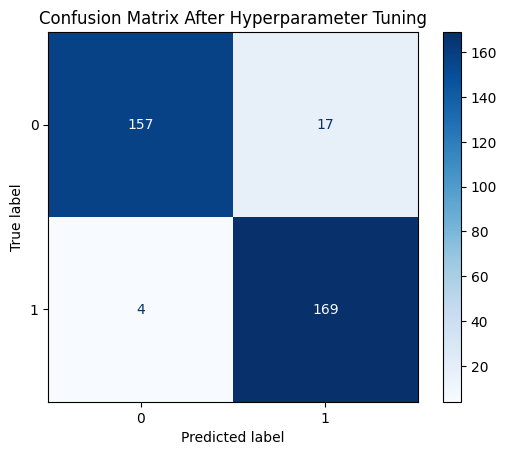

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix After Hyperparameter Tuning')
plt.show()


**True Negatives (TN):** 157 samples were accurately predicted as class 0 by the model.

**False Positives (FP):** 17 samples that are truly class 0 were mistakenly forecasted by the model as class 1.

**False Negatives (FN):** 4 samples that were class 1 were mistakenly forecasted as class 0 by the model.

**True Positives (TP):** 169 samples were accurately classified as class 1 by the model.

In summary, the model predicts 169 out of 173 samples accurately, demonstrating good performance, particularly for class 1 (positive class).  Although there are 17 false positives, which is a little higher but still manageable, the model also does well for class 0.  Overall, the model shows balanced categorisation results and good accuracy.

# ***5.Unsupervised Learning Algorithms***

Machine learning techniques known as unsupervised algorithms look for structure or patterns in data without the use of labelled results.  Without using predetermined categories or goals, they examine the input data to categorise, cluster, or minimise dimensions.

In [73]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

#K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_train)

kmeans_silhouette = silhouette_score(X_train, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

#DBSCAN
#Set eps and min_samples parameters 
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train)

# DBSCAN -1 tag for noise points
# Calculate silhouette excluding noise
mask = dbscan_labels != -1
if np.sum(mask) > 1: 
    dbscan_silhouette = silhouette_score(X_train[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN has insufficient clusters (or too much noise) for silhouette score.")

# Observe cluster labels
print("K-Means cluster counts:", np.bincount(kmeans_labels))
print("DBSCAN cluster counts:", np.bincount(dbscan_labels[dbscan_labels != -1]))
print("DBSCAN noise points:", np.sum(dbscan_labels == -1))


K-Means Silhouette Score: 0.5894
DBSCAN Silhouette Score (excluding noise): 0.9746
K-Means cluster counts: [775 610]
DBSCAN cluster counts: [ 7  7 17  9 14 18  6 15  5  5  7  5]
DBSCAN noise points: 1270


According to the clustering results, DBSCAN produced more distinct and cohesive clusters than K-Means, as seen by its significantly higher Silhouette Score (0.9746).  While DBSCAN identified several smaller clusters (12 clusters of various sizes) and classified 1270 points as noise (outliers), K-Means created two clusters with sizes of 775 and 610.

DBSCAN's noise points are probably abnormal or difficult-to-classify data, which can be helpful in spotting fraudulent job ads.  This behaviour aids in identifying odd patterns that K-Means could overlook, even when DBSCAN flags a large number of points as noise.

These findings suggest that DBSCAN performs better on this dataset of actual versus phoney jobs.

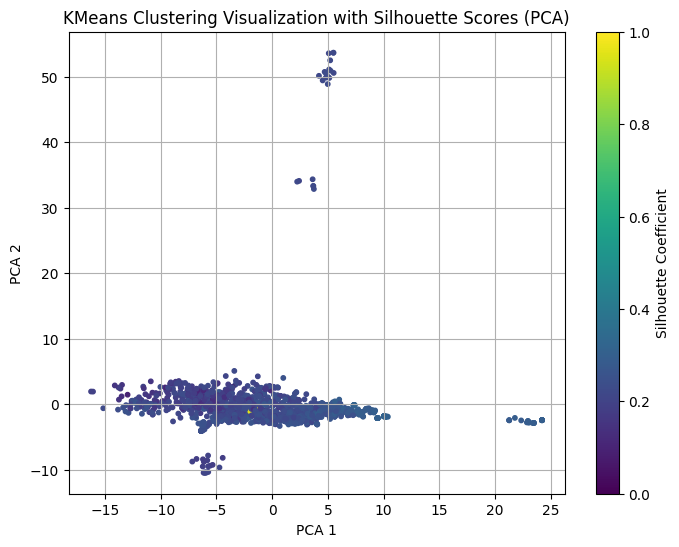

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_train)

#KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

#Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled.toarray() if hasattr(X_scaled, "toarray") else X_scaled)

#Calculate the Silhouette score for each sample
silhouette_vals = silhouette_samples(X_scaled, kmeans_labels)

#Adjust colors according to Silhouette scores 
norm = plt.Normalize(silhouette_vals.min(), silhouette_vals.max())
colors = plt.cm.viridis(norm(silhouette_vals))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=10)
plt.colorbar(label='Silhouette Coefficient')
plt.title("KMeans Clustering Visualization with Silhouette Scores (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

The majority of silhouette ratings, which range from 0 to 0.3, show that the clusters are not clearly delineated.  Scores near zero indicate that a large number of points are either unclearly assigned to a particular cluster or lie close to cluster boundaries.  Some points fit well within their clusters when there are a few scores close to 1.  All things considered, this suggests that the clustering structure is weak or overlapping, and that additional adjustment or different techniques may be required to enhance cluster separation.

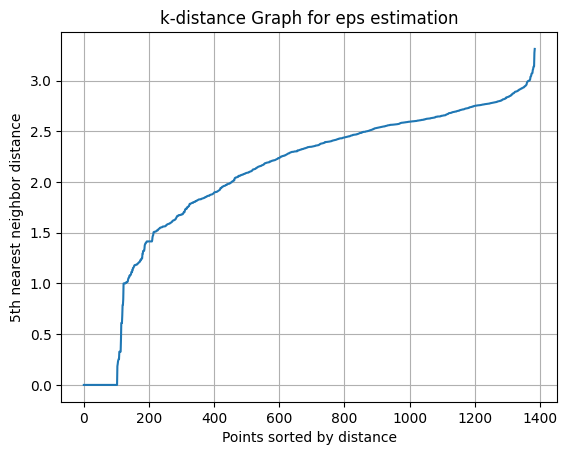

In [76]:
from sklearn.neighbors import NearestNeighbors

k = 5  # same with min_samples

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_train)

distances = np.sort(distances[:, k-1], axis=0)

plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th nearest neighbor distance')
plt.title('k-distance Graph for eps estimation')
plt.grid(True)
plt.show()


In [77]:
#Scale the data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_train)

#Create DBSCAN model, eps=1.5, min_samples=5
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Calculate silhouette score (remove noise points labeled -1)
mask = dbscan_labels != -1
if np.sum(mask) > 1:
    score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {score:.4f}")
else:
    print("Too few clusters (or too much noise) to calculate silhouette score.")

#Noise and cluster number information
num_noise = np.sum(dbscan_labels == -1)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {num_noise}")

DBSCAN Silhouette Score (excluding noise): 0.9998
Number of clusters found: 10
Number of noise points: 1281


It's crucial to determine the proper eps and min_samples settings for DBSCAN.  At first, eps=0.5 and the Silhouette Score was 0.9746.

The k-distance graph was used to visually determine the eps value after min_samples=5 was set to enhance clustering quality.  The graph's most noticeable "elbow," or abrupt ascent, was located at 1.5. The boundary where dense cluster regions terminate is represented by this location.

Result: DBSCAN's performance was significantly enhanced by changing the eps value from 0.5 to 1.5.

With noise removed, the Silhouette Score rose from 0.9746 to 0.9998, showing nearly flawless cluster separation.

The model identified 1281 points as noise and discovered 10 clusters. The near-perfect Silhouette score validates the quality of the clusters discovered, even though a high number of noise points can suggest that the dataset contains sparse sections in nature or that eps is still tight.  In conclusion, the k-distance plot is a useful technique that enables us to significantly enhance the clustering quality and intuitively determine the ideal value for the eps hyperparameter.

# ***6.Conclusion***

This project uses machine learning to tackle the problem of identifying phoney or authentic job postings.  The dataset required a thorough preparation pipeline prior to model application because it was mainly made up of text-based and categorical variables.

**Data Preparation:** The structure and feature distributions of the dataset were revealed via Initial Exploratory Data Analysis (EDA). Extensive data preparation procedures came next. The dataset was prepared for model training by applying a number of transformations to turn the raw text and category data into an appropriate numerical format, as machine learning algorithms are unable to analyse these types of data directly.

**Supervised Learning:** We investigated the Random Forest and Logistic Regression methods for supervised categorisation.  After initial testing, the two models' performances were compared using a number of metrics (such as accuracy, precision, recall, and F1-score).  Because of its performance, we decided to use logistic regression for more optimisation. The Logistic Regression model's scores and overall predictive capability were then increased by hyperparameter adjustment.

**Unsupervised Learning:** In addition to classification, unsupervised learning approaches were used to assess the dataset in order to identify underlying trends.  The clustering techniques K-Means and DBSCAN were used.  DBSCAN proved to be the more successful approach for this dataset based on a comparison of their individual clustering metrics and visual representations.  The DBSCAN hyperparameter tuning process was then carried out, with an emphasis on maximising the eps (epsilon) value.  Improved scores (such as the Silhouette Score) show that we were effective in improving the clustering performance by raising the eps value.

To sum up, our study used a methodical approach, from selecting comparative models in both supervised and unsupervised domains and preparing data to fine-tuning hyperparameters for the best results in distinguishing between genuine and fraudulent job listings.

